In [6]:
#Relax Challenge

#importing data
import pandas as pd

user_engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [7]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
#need to combine datasets into one

users.rename(columns={'object_id': 'user_id'}, inplace=True)
df = pd.merge(user_engagement, users, how='left', on=['user_id'])

In [12]:
df.head()

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [13]:
df.isna().sum()

time_stamp                        0
user_id                           0
visited                           0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
dtype: int64

In [15]:
# Narrowing down users who logged in 3 times in total
three_logins = df.groupby('user_id').filter(lambda x: len(x) >=3)
print('There are {} unique users who logged in 3 times or more in total'\
      .format(len(three_logins['user_id'].unique())))

three_logins.head()

There are 2248 unique users who logged in 3 times or more in total


,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,2013-11-15 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
5,2013-12-31 03:45:04,2,1,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [16]:

# Remove index
three_logins.reset_index(drop=True, inplace = True)

# Finding how many of the 2248 unique three-logins users are adopted users 
# who have logged in three separate days in at least one 7 day period 

adopted = 0
adopted_users = []
for i in range(len(three_logins)-2):
    user = three_logins['user_id'][i]
    if user != adopted and user == three_logins['user_id'][i+2]:
    # Get start date 
        sd = pd.Timestamp(three_logins['time_stamp'][i])
        # 7 days period end date
        ed = sd + pd.Timedelta('7D')
        if sd < pd.Timestamp(three_logins['time_stamp'][i+1]) < ed and sd < \
        pd.Timestamp(three_logins['time_stamp'][i+2]) < ed:
            adopted_users.append(user)
            adopted = user

In [20]:
# Add our new adopted_users feature to users dataframe: 1 for adopted and 0 for not-adopted
import numpy as np
y = pd.Series(np.random.randn(len(users)))
n = 0
for i in range(len(users)):
    if users['user_id'][i] == adopted_users[n]:
        y[i] = 1
        n = n+1
        if n > len(adopted_users)-1:
            n = n -1
    else:
        y[i] = 0
        
users2 = pd.DataFrame(y, columns = ['adopted_users'])
df = pd.concat([users, users2], axis=1)
print((df[df['adopted_users'] == 1]).count())

user_id                       1602
creation_time                 1602
name                          1602
email                         1602
creation_source               1602
last_session_creation_time    1602
opted_in_to_mailing_list      1602
enabled_for_marketing_drip    1602
org_id                        1602
invited_by_user_id             913
adopted_users                 1602
dtype: int64


In [21]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [25]:
#one-hot encoding for categorical veriable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'])


LabelEncoder()

In [26]:
creation = le.transform(df['creation_source'])

In [28]:
df4 = pd.DataFrame(creation, columns = ['creation'])
df = pd.concat([df ,df4], axis=1)
df.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,creation
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0
5,6,12/17/2013 3:37,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0,0
6,7,12/16/2012 13:24,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0.0,3
7,8,7/31/2013 5:34,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0.0,2
8,9,11/5/2013 4:04,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0.0,2
9,10,1/16/2013 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0,1


In [51]:
df.dtypes

user_id                                int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
adopted_users                        float64
creation                               int32
dtype: object

In [52]:
df['creation_time'] = pd.to_datetime(df['creation_time'])


In [56]:
#changing 'creation_time' to int64 to be able to run my model
df['creation_time'] = df['creation_time'].astype(np.int64)

In [57]:
df.dtypes

user_id                         int64
creation_time                   int64
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_users                 float64
creation                        int32
dtype: object

#I'm going to try XGBoost Classifier to find the important determining features.

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
# imports for xgboost
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, cv, plot_importance

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# define features and target
X = df[['creation_time', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id','creation']]
y = df['adopted_users']
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [59]:
#running the model
model = XGBClassifier(enable_categorical=True)
model.fit(X_train, y_train)

[14:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "enable_categorical" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=True,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [61]:
# Print best parameters and results
print(model.feature_importances_)


[0.30629796 0.49663147 0.04440922 0.06670535 0.04481141 0.04114473]


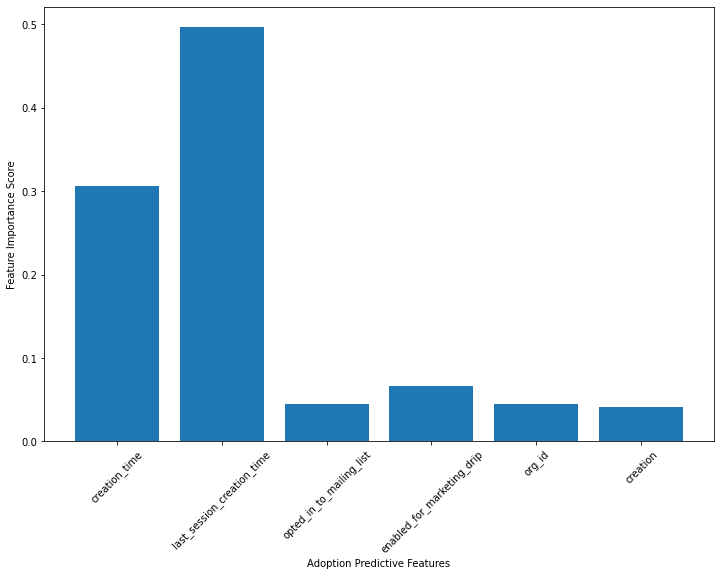

In [64]:

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# Plot the feature importances for our target label of adopted users 
feat_imp = model.feature_importances_

plt.figure(figsize=(12,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
xcol = X.columns
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.xticks(range(len(xcol)), xcol.values, rotation=45)
plt.show()

#The creation time and time of last session are the most important features in determining and active user.

In [65]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.28%
